In [1]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
import numpy as np
from numpy import std
from numpy import mean
from numpy.random import shuffle
import matplotlib.pyplot as plt


#Standardization of Data
#Center wine dataset
samples, labels = load_wine(return_X_y=True)
mean = np.mean(samples, axis = 0)
samples = np.asarray([sample - mean for sample in samples]).transpose()


In [2]:
#Compute PCA
numDims = 2
eigs, vecs = np.linalg.eig(samples @ samples.transpose())
PC = np.vstack(vecs[0:numDims])
features = PC @ samples

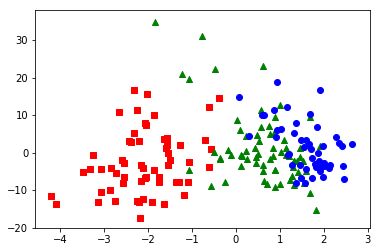

In [3]:
#Plot centered PCA features
zeros = features.transpose()[np.where(labels == 0)] 
ones = features.transpose()[np.where(labels == 1)] 
twos = features.transpose()[np.where(labels == 2)] 
plt.scatter(zeros[:,0], zeros[:,1], color = 'red', marker = "s")
plt.scatter(ones[:,0], ones[:,1], color = 'green', marker = "^")
plt.scatter(twos[:,0], twos[:,1], color = 'blue', marker = "o")
plt.show()

In [4]:
#Normalize wine dataset & calculate PCA
std_dev = np.std(samples,axis=1)

for i in range(len((samples.transpose()))):
    samples.transpose()[i] = np.divide(samples.transpose()[i],std_dev)    

In [5]:
eigs_n, vecs_n = np.linalg.eig(samples @ samples.transpose())
PC_n = np.vstack(vecs_n[0:numDims])
features_n = PC_n @ samples

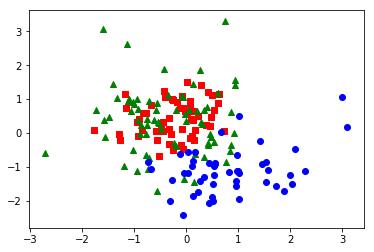

In [6]:
zeros_n = features_n.transpose()[np.where(labels == 0)] 
ones_n = features_n.transpose()[np.where(labels == 1)] 
twos_n = features_n.transpose()[np.where(labels == 2)] 
plt.scatter(zeros_n[:,0], zeros_n[:,1], color = 'red', marker = "s")
plt.scatter(ones_n[:,0], ones_n[:,1], color = 'green', marker = "^")
plt.scatter(twos_n[:,0], twos_n[:,1], color = 'blue', marker = "o")
plt.show()

In [7]:
#There is more overlap between the classes, so the PCA features of only
#the mean-centered data would lead to better classification performance

In [139]:
k = 5
#Case 1
data = np.vstack((features, labels))
shuffle(data.transpose())
data.transpose()
feat = np.array_split(data, k, 1)
accuracy = []
for i in range(0, k):
    temp_array = []
    train = feat[0]
    for j in range(0,k):
        if i == j:
            train = feat[j]
        else:
            temp_array.append(feat[j])
    NB = GaussianNB()
    for train in temp_array:
        NB.partial_fit(train[0:1,:], train[2,:])

ValueError: Found input variables with inconsistent numbers of samples: [1, 36]